# **Pollution Data Time Series Analysis Using ARIMA**
**MILLARE, LUCKY OWELL U.**

**BSCS-IS-3B**

#**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#**1. DATASET PRESENTATION**

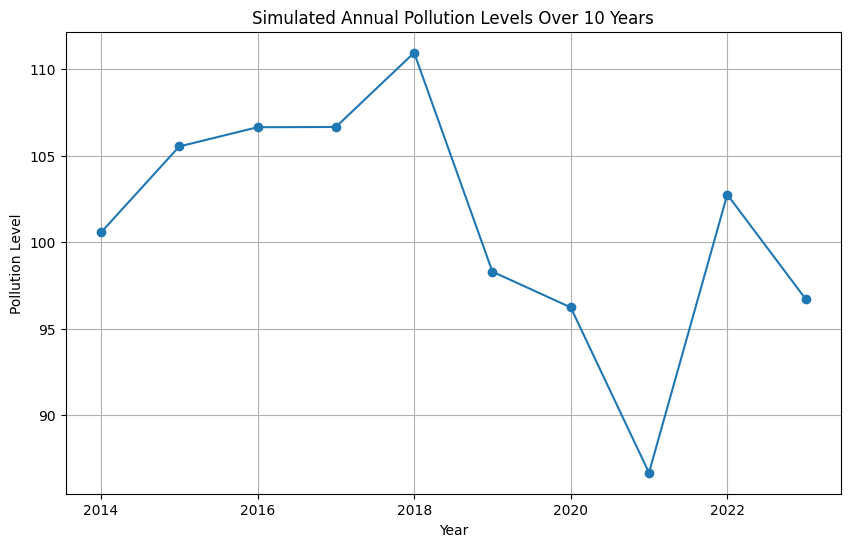

In [ ]:
df = pd.read_csv('most-polluted-countries.csv')

# Simulate time series data with trend and seasonality
years = np.arange(2014, 2024)
trend = 0.05 * years
seasonal = 10 * np.sin(np.pi * (years - 2014) / 5)
noise = np.random.normal(0, 5, len(years))

# Simulated pollution levels
pollution = trend + seasonal + noise

# Plot the simulated time series
plt.figure(figsize=(10, 6))
plt.plot(years, pollution, marker='o')
plt.title('Simulated Annual Pollution Levels Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.grid(True)
plt.show()

#**2.STATIONARITY TESTING**

In [ ]:
# Perform Augmented Dickey-Fuller test
def stationarity_test(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

print("Stationarity Test Results:")
stationarity_test(pollution)

Stationarity Test Results:
ADF Statistic: -2.4911134307481455
p-value: 0.11765152250884925
Critical Values:
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733


#**3. ARIMA MODEL IDENTIFICATION**

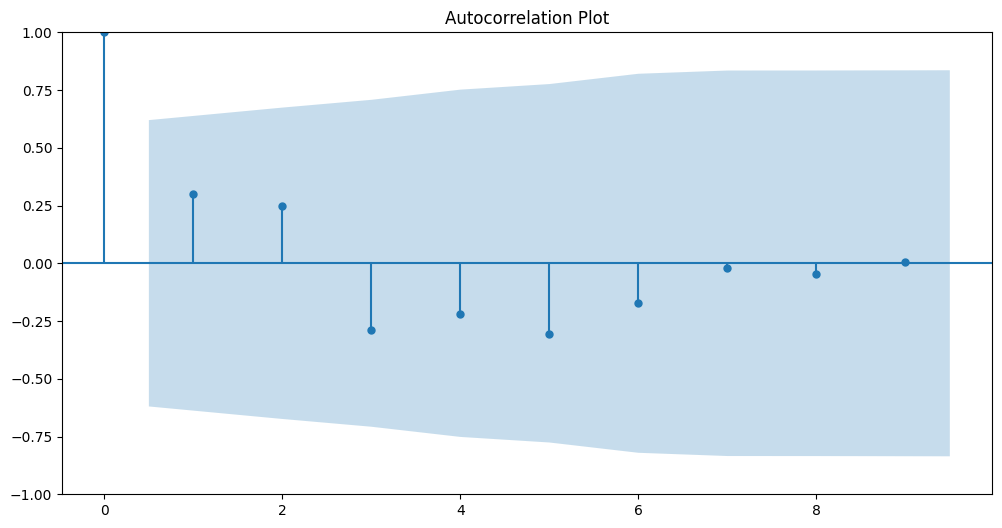

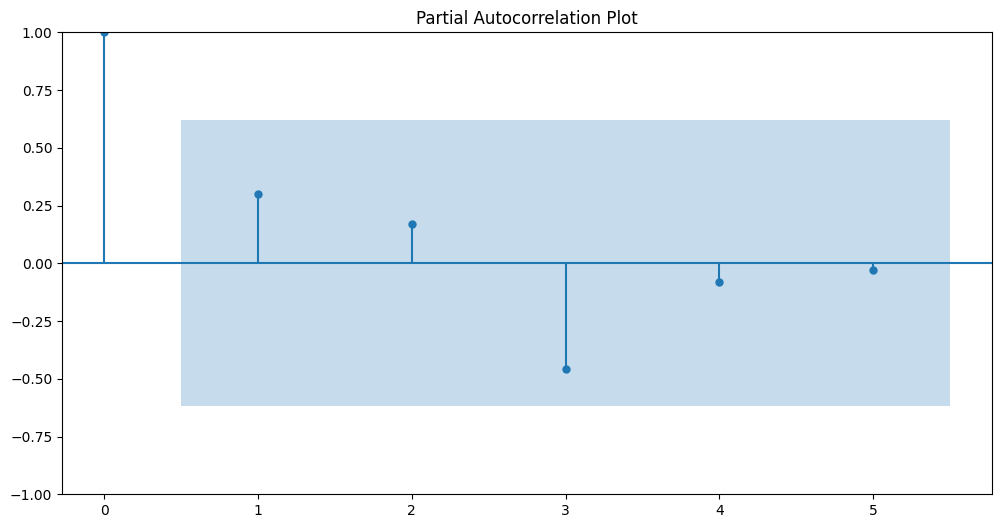

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(pollution, ax=plt.gca(), lags=len(pollution) - 1)
plt.title("Autocorrelation Plot")
plt.show()

# Set nlags to be approximately half of the sample size
nlags = len(pollution) // 2

plt.figure(figsize=(12, 6))
plot_pacf(pollution, ax=plt.gca(), lags=nlags)
plt.title("Partial Autocorrelation Plot")
plt.show()

#**4. ARIMA MODEL FITTING**

In [ ]:
# Fit ARIMA model
model = ARIMA(pollution, order=(1, 1, 1))
model_fit = model.fit()

# Evaluate model fit
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -30.614
Date:                Fri, 29 Mar 2024   AIC                             67.228
Time:                        16:12:27   BIC                             67.820
Sample:                             0   HQIC                            65.951
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4619      2.200     -0.210      0.834      -4.774       3.850
ma.L1          0.2046      2.165      0.095      0.925      -4.038       4.447
sigma2        52.2421     42.194      1.238      0.216     -30.457     134.941
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.66   Prob(JB):                         0.74
Heteroskedasticity (H):               2.42   Skew:                             0.06
Prob(H) (two-sided):                  0.49   Kurtosis:                         1.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#**5. FORECASTING**

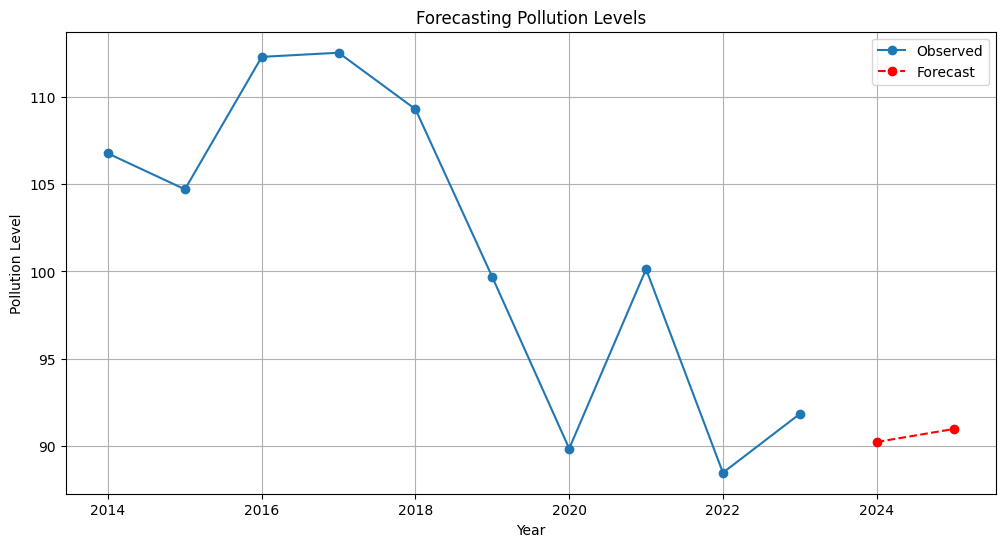

In [ ]:
# Forecast pollution levels for the next 2 years
forecast_steps = 2
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = range(2024, 2024 + forecast_steps)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(years, pollution, marker='o', label='Observed')
plt.plot(forecast_years, forecast, marker='o', linestyle='dashed', color='red', label='Forecast')
plt.title("Forecasting Pollution Levels")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.legend()
plt.grid(True)
plt.show()

#**6. REPORT AND INSIGHTS**

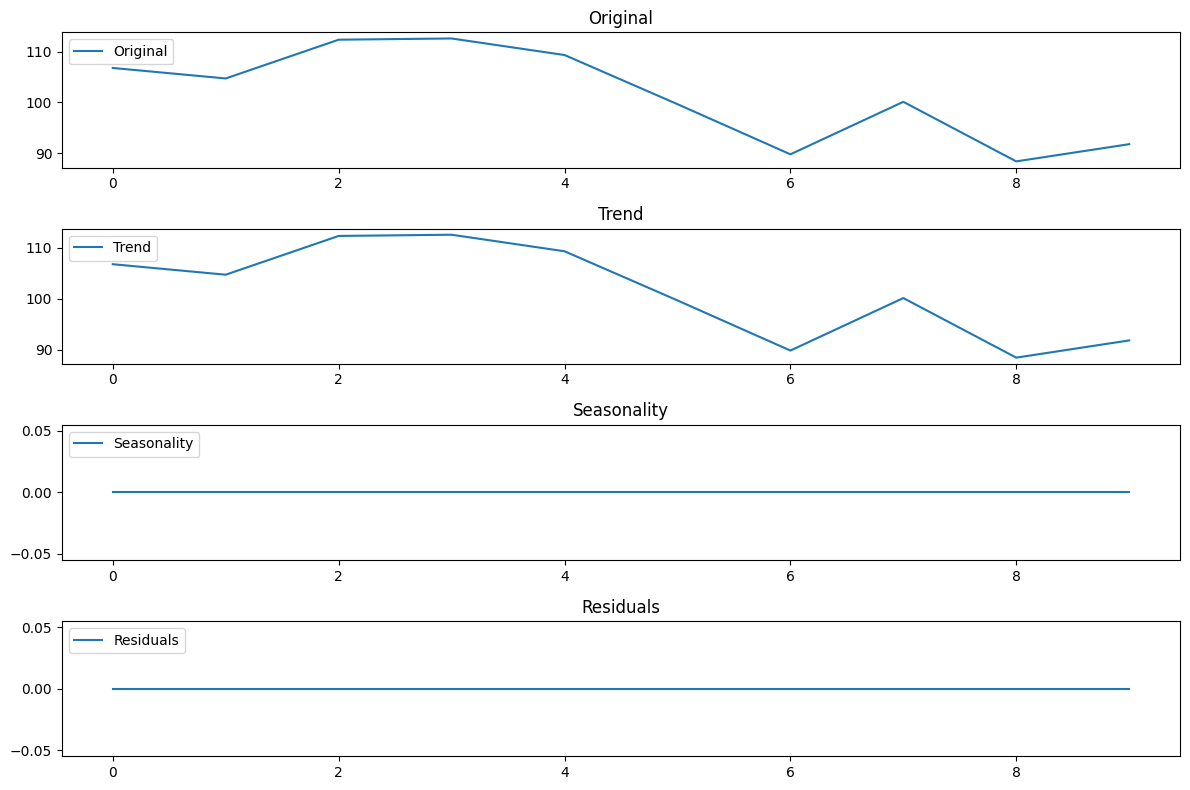

In [ ]:
# Seasonal Decomposition
decomposition = seasonal_decompose(pollution, model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(pollution, label='Original')
plt.legend(loc='upper left')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()